In [1]:
import pandas as pd
import csv

## Import Data


In [2]:
file_to_load = "Resources/Pokemon_main_values.csv"
chart_to_load = "resources/chart.csv"
Pokemon_chart = pd.read_csv(chart_to_load)
Pokemon_data = pd.read_csv(file_to_load)
Pokemon_data
#Pokemon_chart

,#,Name,Type 1,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
0,1,Bulbasaur,Grass,318,45,49,49,65,65,45,1
1,2,Ivysaur,Grass,405,60,62,63,80,80,60,1
2,3,Venusaur,Grass,525,80,82,83,100,100,80,1
3,3,VenusaurMega Venusaur,Grass,625,80,100,123,122,120,80,1
4,4,Charmander,Fire,309,39,52,43,60,50,65,1
...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,600,50,100,150,100,150,50,6
796,719,DiancieMega Diancie,Rock,700,50,160,110,160,110,110,6
797,720,HoopaHoopa Confined,Psychic,600,80,110,60,150,130,70,6
798,720,HoopaHoopa Unbound,Psychic,680,80,160,60,170,130,80,6


## Clean Data

## Random Pokemon Generator

## Number of Resistances and Effectivenesses by Type 

## Pokemon Ranking

## Attack vs Defense Correlation by Type

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.stats import linregress

The r-squared is : 0.540743657060925


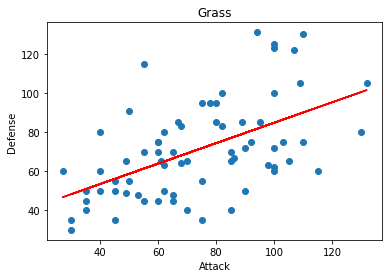

The r-squared is : 0.3646922464208143


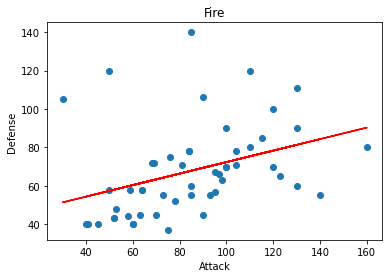

The r-squared is : 0.5161628601933549


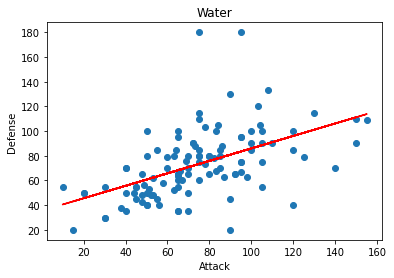

The r-squared is : 0.36162150204987326


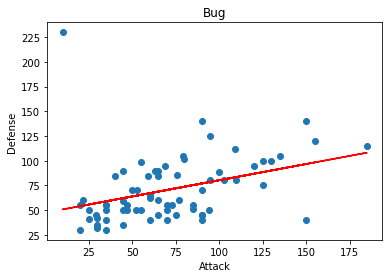

The r-squared is : 0.7385103231619194


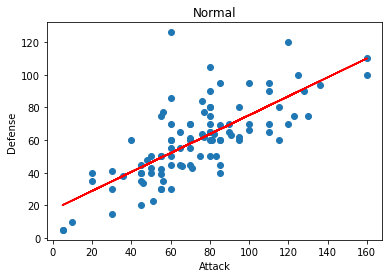

The r-squared is : 0.4625410313806518


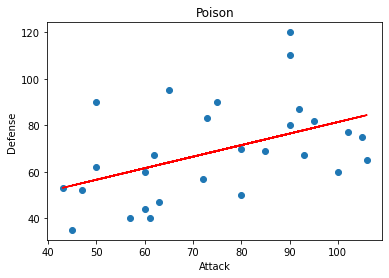

The r-squared is : 0.33341569831842616


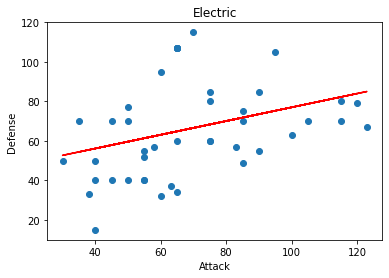

The r-squared is : 0.5972335985090407


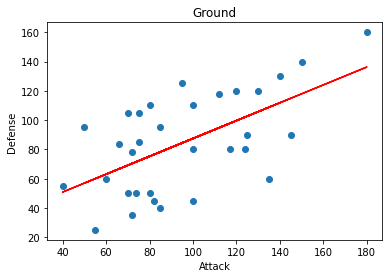

The r-squared is : 0.523612960905597


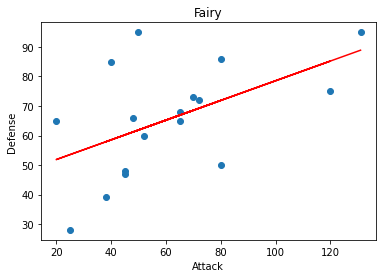

The r-squared is : 0.6225040313285795


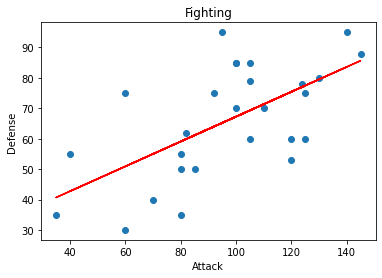

The r-squared is : 0.33693079701846346


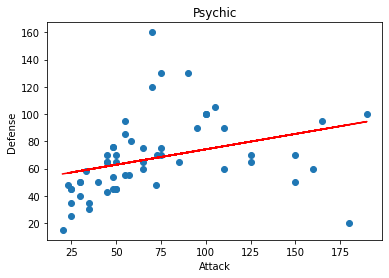

The r-squared is : -0.08795074385851195


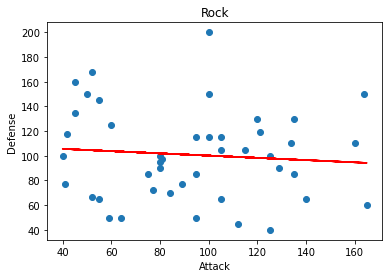

The r-squared is : 0.33069172109805284


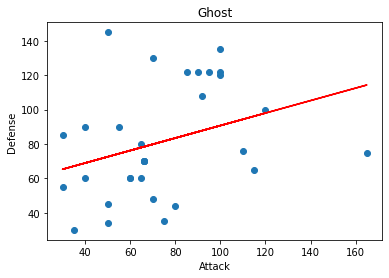

The r-squared is : 0.6150229920595142


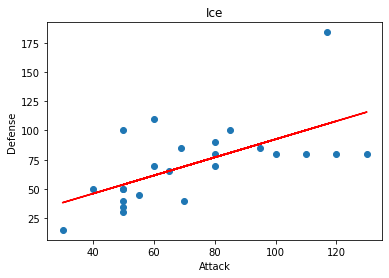

The r-squared is : 0.6652140439722745


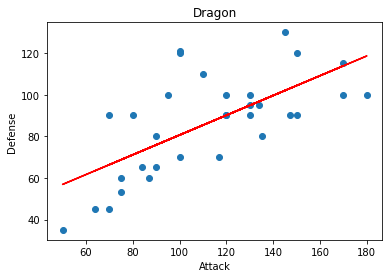

The r-squared is : 0.19584500776797656


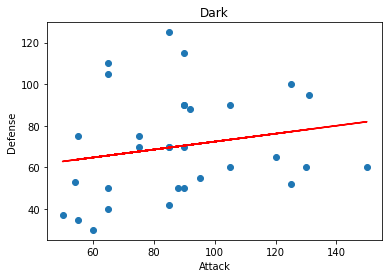

The r-squared is : 0.37210249005978413


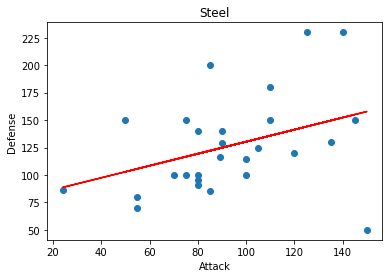

The r-squared is : 0.7620679139659167


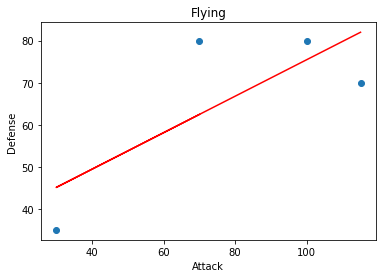

In [4]:
poke_list = list(Pokemon_data['Type 1'].unique())

rvalue_list = []

for i in poke_list:
    poke_df = Pokemon_data.loc[Pokemon_data['Type 1'] == i]
    
    x = poke_df['Attack']
    y = poke_df['Defense']
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x,y)
    print(f'The r-squared is : {rvalue}')
    regress_value = x * slope + intercept
    rvalue_list.append(rvalue)
    
    plt.scatter(x,y)
    plt.plot(x,regress_value,"r-")
    
    plt.title(i)
    plt.xlabel('Attack')
    plt.ylabel('Defense')
    plt.show()

In [5]:
#store all the r value in a data table for each type
rvalue_table = pd.DataFrame({'Type':poke_list,
                             'R-value':rvalue_list})
rvalue_table

,Type,R-value
0,Grass,0.540744
1,Fire,0.364692
2,Water,0.516163
3,Bug,0.361622
4,Normal,0.738510
5,Poison,0.462541
6,Electric,0.333416
7,Ground,0.597234
8,Fairy,0.523613
9,Fighting,0.622504


## Statistical Analysis of Attack vs Defense  by Type

In [6]:
attack_median = []
attack_lq = []
attack_uq = []
attack_iqr = []
attack_lb = []
attack_ub = []

defense_median = []
defense_lq = []
defense_uq = []
defense_iqr = []
defense_lb = []
defense_ub = []

for i in poke_list:
    poke_df = Pokemon_data.loc[Pokemon_data['Type 1'] == i]
    
    quartiles_a = poke_df["Attack"].quantile([.25,.5,.75])
    lowerq_a = quartiles_a[0.25]
    upperq_a = quartiles_a[0.75]
    iqr_a = upperq_a-lowerq_a
    lower_bound_a = lowerq_a - (1.5*iqr_a)
    upper_bound_a = upperq_a + (1.5*iqr_a)
        
    quartiles_d = poke_df["Defense"].quantile([.25,.5,.75])
    lowerq_d = quartiles_d[0.25]
    upperq_d = quartiles_d[0.75]
    iqr_d = upperq_d-lowerq_d
    lower_bound_d = lowerq_d - (1.5*iqr_d)
    upper_bound_d = upperq_d + (1.5*iqr_d)
    
    attack_median.append(quartiles_a[0.5])
    attack_lq.append(lowerq_a)
    attack_uq.append(upperq_a)
    attack_iqr.append(iqr_a)
    attack_lb.append(lower_bound_a)
    attack_ub.append(upper_bound_a)
    defense_median.append(quartiles_d[0.5])
    defense_lq.append(lowerq_d)
    defense_uq.append(upperq_d)
    defense_iqr.append(iqr_d)
    defense_lb.append(lower_bound_d)
    defense_ub.append(upper_bound_d)
    
    print(f"----------{i}--------------")
    print("Attack")
    print(f"Median: {quartiles_a[.5]}")
    print(f"Lower quartile: {lowerq_a}")
    print(f"Upper quartile:{upperq_a}")
    print(f"Interquartile: {iqr_a}")
    print(f"Values above {upper_bound_a} could be outliers")
    print(f"Values below {lower_bound_a} could be outliers")
    print("Defense")
    print(f"Median: {quartiles_d[.5]}")
    print(f"Lower quartile: {lowerq_d}")
    print(f"Upper quartile: {upperq_d}")
    print(f"Interquartile: {iqr_d}")
    print(f"Values above {upper_bound_d} could be outliers")
    print(f"Values below {lower_bound_d} could be outliers")
   

----------Grass--------------
Attack
Median: 70.0
Lower quartile: 55.0
Upper quartile:93.5
Interquartile: 38.5
Values above 151.25 could be outliers
Values below -2.75 could be outliers
Defense
Median: 66.0
Lower quartile: 50.0
Upper quartile: 84.5
Interquartile: 34.5
Values above 136.25 could be outliers
Values below -1.75 could be outliers
----------Fire--------------
Attack
Median: 84.5
Lower quartile: 62.25
Upper quartile:101.0
Interquartile: 38.75
Values above 159.125 could be outliers
Values below 4.125 could be outliers
Defense
Median: 64.0
Lower quartile: 51.0
Upper quartile: 78.0
Interquartile: 27.0
Values above 118.5 could be outliers
Values below 10.5 could be outliers
----------Water--------------
Attack
Median: 72.0
Lower quartile: 53.0
Upper quartile:92.0
Interquartile: 39.0
Values above 150.5 could be outliers
Values below -5.5 could be outliers
Defense
Median: 70.0
Lower quartile: 54.5
Upper quartile: 88.5
Interquartile: 34.0
Values above 139.5 could be outliers
Values 

In [7]:
poke_table = pd.DataFrame({'Type':poke_list,
                             'Attack Median':attack_median,
                             'Lower quartile': attack_lq,
                             'Upper quartile':attack_uq,
                             'Iqr':attack_iqr,
                             'Lower bound':attack_lb,
                             'Upper bound':attack_ub,
                             'Defense Median':defense_median,
                             'Loewr quartile':defense_lq,
                             'Upper quartile':defense_uq,
                             'Iqr':defense_iqr,
                             'Lower bound':defense_lb,
                             'Upper bound':defense_ub
                            })
poke_table

,Type,Attack Median,Lower quartile,Upper quartile,Iqr,Lower bound,Upper bound,Defense Median,Loewr quartile
0,Grass,70.0,55.00,84.50,34.50,-1.750,136.250,66.0,50.00
1,Fire,84.5,62.25,78.00,27.00,10.500,118.500,64.0,51.00
2,Water,72.0,53.00,88.50,34.00,3.500,139.500,70.0,54.50
3,Bug,65.0,45.00,90.00,40.00,-10.000,150.000,60.0,50.00
4,Normal,70.5,55.00,73.75,30.50,-2.500,119.500,60.0,43.25
5,Poison,74.0,60.00,82.25,29.50,8.500,126.500,67.0,52.75
6,Electric,65.0,53.75,80.00,30.25,4.375,125.375,65.0,49.75
7,Ground,85.0,72.00,110.00,56.25,-30.625,194.375,84.5,53.75
8,Fairy,52.0,45.00,75.00,25.00,12.500,112.500,66.0,50.00
9,Fighting,100.0,80.00,79.50,25.50,15.750,117.750,70.0,54.00
